In [1]:
import numpy as np
import matplotlib.pyplot as plt

## PCA using numpy 

In [2]:

mean = [0, 0]
cov = [
        [1, .8],
        [.8, 1]
      ]  # diagonal covariance

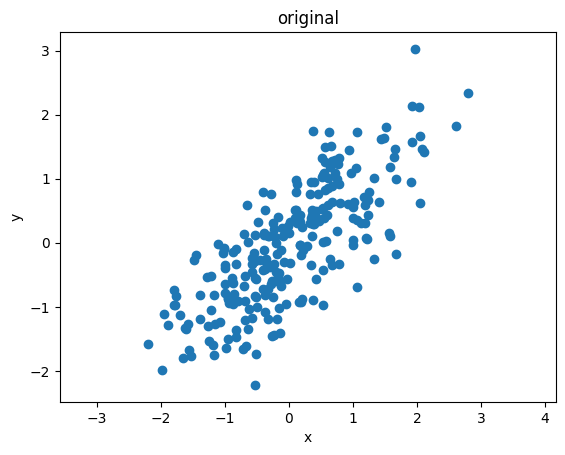

In [3]:
x, y = np.random.multivariate_normal(mean, cov, 250).T
plt.plot(x, y, 'o')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('original')
plt.show()

In [4]:
eival,eivec = np.linalg.eig(cov)
eival, eivec

(array([1.8, 0.2]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [5]:
scalex1= eival[0]
x1direction=eivec.T[0]
x1arrow = -3 * np.sqrt(scalex1) * x1direction 
# 3 * sqrt(explained varaiance) * first principal component direction (vector) 99.7%/2
x1arrow

array([-2.84604989, -2.84604989])

In [6]:
scalex2= eival[1]
x2direction=eivec.T[1]
x2arrow = -3 * np.sqrt(scalex2) * x2direction 
x2arrow

array([ 0.9486833, -0.9486833])

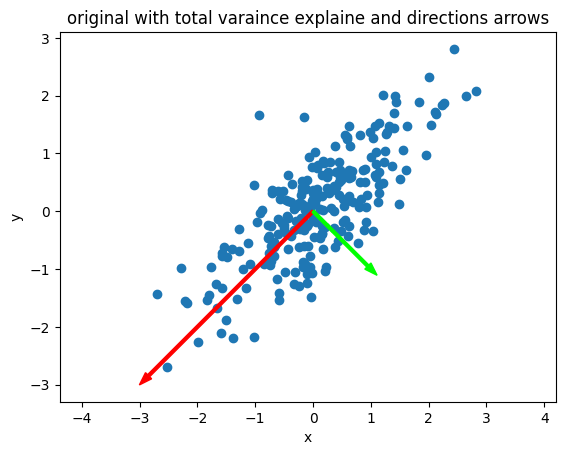

In [7]:
x, y = np.random.multivariate_normal(mean, cov, 250).T
plt.plot(x, y, 'o', zorder=1)
plt.axis('equal')
plt.arrow(mean[0], mean[1], x1arrow[0],x1arrow[1], zorder=2, width = 0.05, color ='r')
plt.arrow(mean[0], mean[1], x2arrow[0],x2arrow[1], zorder=3, width = 0.05, color ='lime')
plt.xlabel('x')
plt.ylabel('y')
plt.title('original with total varaince explaine and directions arrows')
plt.show()

In [8]:
np.c_[x,y][:10] #shows only top 10, matrix is 250x2

array([[ 0.37965371, -0.61110126],
       [ 0.16339161, -0.65809194],
       [-1.53910415, -0.61709027],
       [-0.13172876, -0.91858506],
       [ 0.55158385,  1.31989988],
       [ 1.42386544,  2.00197652],
       [ 2.23556354,  1.84693049],
       [-0.19584397,  0.3507898 ],
       [-0.24898017,  0.13615128],
       [-0.14867227,  0.51309953]])

In [9]:
transformed = eivec.T@(np.c_[x,y].T)

(-4.068932589367605,
 4.075618383185525,
 -1.1683655440265908,
 1.9847406667942609)

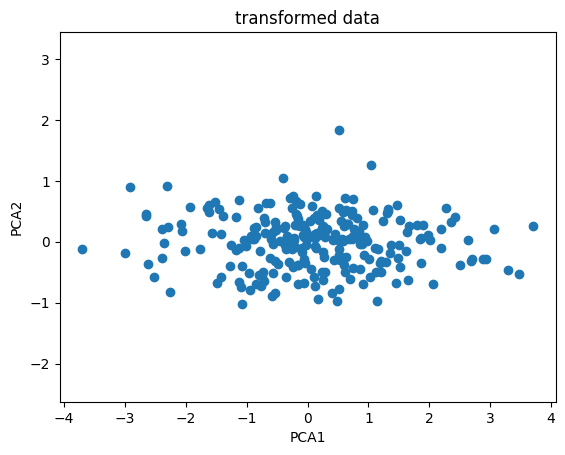

In [10]:
plt.plot(transformed[0],transformed[1], 'o')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('transformed data')
plt.axis('equal')

Doing the same thing as above by piece

In [11]:
eivec.T[1] #direction of the second component

array([-0.70710678,  0.70710678])

In [12]:
PCA1 = eivec.T[0]@(np.c_[x,y].T)

In [13]:
PCA2 = eivec.T[1]@(np.c_[x,y].T)

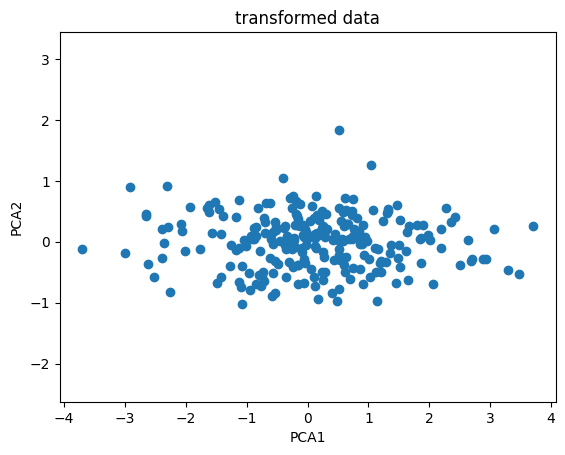

In [14]:
plt.plot(PCA1, PCA2, 'o')
plt.axis('equal')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('transformed data')
plt.show()

## PCA using sklearn

doesn't use the predifined mean or cov 

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # we can do reduction from higher dimensions to R2 or even R1
pca.fit(np.c_[x,y])
print(pca.explained_variance_) #eigen vals
print(pca.components_) #eigen vectors

[1.55025175 0.19684805]
[[-0.71944293 -0.69455156]
 [-0.69455156  0.71944293]]


Note the differences above using numpy. Since we are using generated data of 250 points we find something that is similar but not exactly the same

In [29]:
pca1arrow = pca.components_[0] * np.sqrt(pca.explained_variance_[0]) * 3
pca1arrow

array([-2.68731588, -2.59433982])

In [30]:
pca2arrow = pca.components_[1] * np.sqrt(pca.explained_variance_[1]) * -3 #no negative since it found the opposite direciton
pca2arrow

array([ 0.92446678, -0.95759786])

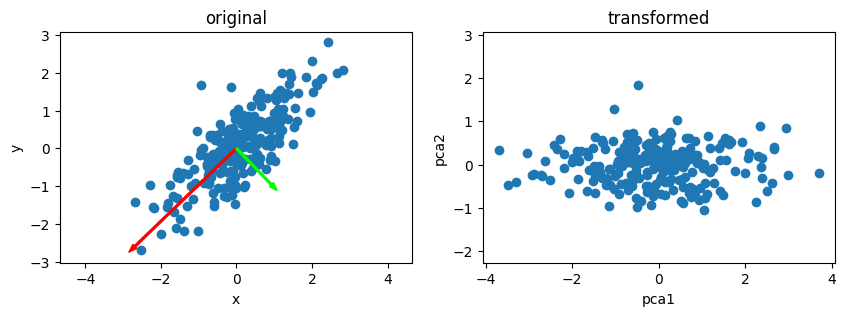

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[1].plot(np.c_[x,y]@pca.components_[0], np.c_[x,y]@pca.components_[1], 'o')
axes[1].axis('equal')
axes[1].set(xlabel='pca1', ylabel='pca2', title='transformed')
axes[0].plot(x,y,'o',zorder=1)
axes[0].axis('equal')
axes[0].arrow(0,0, pca1arrow[0], pca1arrow[1], zorder=2, color='r', width=0.05)
axes[0].arrow(0,0, pca2arrow[0], pca2arrow[1], zorder=3, color='lime', width=0.05)
axes[0].set(xlabel='x', ylabel='y', title='original')
plt.show()

## PCA with higher dimensions

In [19]:
import pandas as pd

In [20]:
#making a random correlation matrix 10x10
np.random.seed(296315) #found with a while loop
random_matrix = np.random.uniform(-1, 1, (10, 10)) 
correlation_matrix = (random_matrix + random_matrix.T) / 2 # makes it symmetric
np.fill_diagonal(correlation_matrix, 1) #adds 1s through diagonal

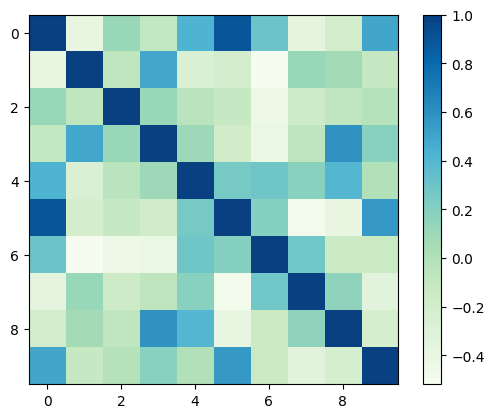

In [21]:
plt.imshow(correlation_matrix, cmap='GnBu')
plt.colorbar()
plt.show()

In [22]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix) 
eigenvalues #make sure all are positive for data generation

array([3.04420324, 2.10801501, 1.73651429, 1.1449745 , 0.71159279,
       0.60353411, 0.37443727, 0.18118086, 0.02038   , 0.07516794])

250 observations, m = 10 (10 features)

In [23]:
samples = np.random.multivariate_normal(np.zeros(10), correlation_matrix, 250)
samples

array([[ 0.99821438, -2.06017655,  0.13468782, ...,  0.10623485,
        -1.10558136, -0.50376511],
       [ 0.3003751 , -0.3578397 ,  0.30256391, ..., -0.88974882,
        -0.81790932,  0.86584179],
       [-1.09394042,  1.73091014, -1.73080281, ...,  0.79509837,
         0.41933311, -0.25881305],
       ...,
       [ 0.66316708,  1.28780582, -0.26299108, ..., -1.70317921,
        -2.6223415 ,  1.87206202],
       [ 1.07645488,  0.10181306, -1.42644006, ..., -0.79709152,
        -0.70700661, -0.20261171],
       [-0.66983342,  0.89420417, -0.64201619, ...,  1.39225113,
        -0.23919942,  0.05422373]])

In [24]:
df = pd.DataFrame(samples) #250x10
df

,0,1,2,3,4,5,6,7,8,9
0,0.998214,-2.060177,0.134688,-2.018034,0.216625,0.434539,2.028885,0.106235,-1.105581,-0.503765
1,0.300375,-0.357840,0.302564,-1.234981,-0.431231,0.428871,-0.613818,-0.889749,-0.817909,0.865842
2,-1.093940,1.730910,-1.730803,1.235626,-1.803964,-0.993745,0.391499,0.795098,0.419333,-0.258813
3,-1.123808,-0.706214,0.423529,-1.524823,-0.438881,-1.512822,0.967604,0.264715,0.004778,-1.792794
4,-0.207518,0.567898,0.011589,1.166364,1.492620,-0.533269,0.003837,0.126242,0.882297,-0.505677
...,...,...,...,...,...,...,...,...,...,...
245,1.868723,-0.055142,0.465189,-0.170183,0.164374,1.768396,-0.759082,-1.328550,-0.580336,1.515126
246,-2.181622,0.655327,-0.425603,0.057319,-1.272162,-1.535079,-0.543003,0.320493,-0.064078,0.024369
247,0.663167,1.287806,-0.262991,0.515226,-2.322091,1.526140,0.605228,-1.703179,-2.622342,1.872062
248,1.076455,0.101813,-1.426440,-0.635348,-0.608963,1.520327,1.332644,-0.797092,-0.707007,-0.202612


In [25]:
X = samples

In [26]:
sampled_cov = np.cov(samples) #won't be the same as we generated the data with.
pca2 = PCA(n_components=2) #reducing to r2 so we are able to draw a scatter plot
pca2.fit(samples)
pca2.explained_variance_ratio_
pca2.components_

array([[-0.4851867 ,  0.34833691, -0.03959109,  0.2779731 , -0.11091871,
        -0.49567957, -0.20190708,  0.3062889 ,  0.307195  , -0.27833334],
       [ 0.0819786 ,  0.34073336,  0.23080843,  0.37056971, -0.26513175,
         0.17048569, -0.55690534, -0.3960151 , -0.04245504,  0.3441681 ]])

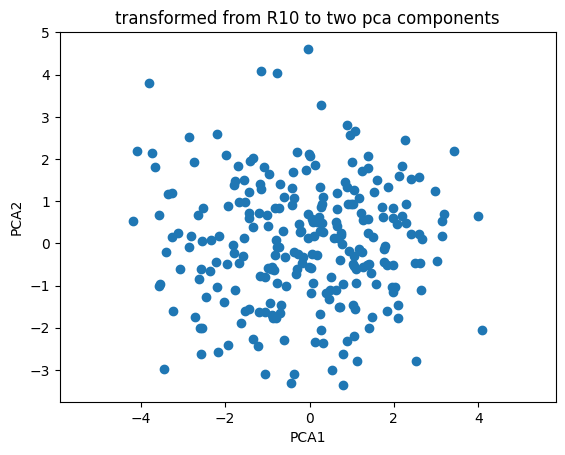

In [27]:
plt.plot(X@pca2.components_[0],X@pca2.components_[1], 'o')
plt.axis('equal')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('transformed from R10 to two pca components')
plt.show()

## ICA 